# Численное интегрирование дифференциального уравнения (лабораторная работа №8)
Выполнил Кирилл Чекушев

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Аналитическое решение 

Дано дифференциальное уравнение второго порядка: $$ y'' + y' - 4y = xe^{-x} $$
С начальными условиями: $$ y(0) = 1,\ y'(0) = 0 $$

Решением задачи Коши в таком случае будет:

$$ y(x) = -\frac{1}{544}e^{-\frac{3+\sqrt{17}}{2}x}
    \left(34e^{\frac{1+\sqrt{17}}{2}x} (4x-1) + 5(5\sqrt{17}-51)e^x - 
     5(51+5\sqrt{17})e^{(1+\sqrt{17})x}\right) $$

Text(0.5, 1.0, 'Аналитическое решение задачи Коши')

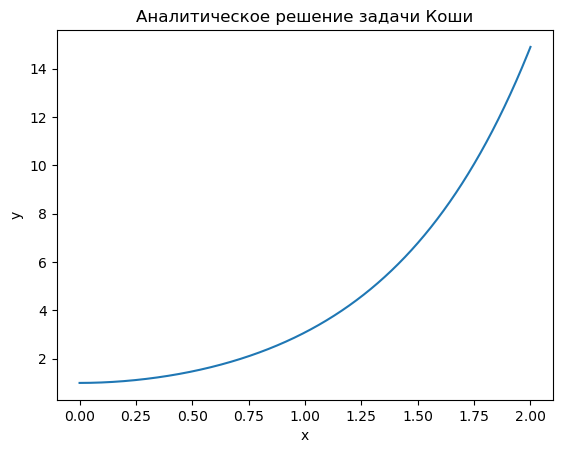

In [2]:
# Создание сетки значений х
x_levo, x_pravo = 0, 2
x_h = 1e-4
x_setka = np.linspace(x_levo, x_pravo, int((x_pravo-x_levo)/x_h))

# Массив с аналитичеким решением ДУ
x = x_setka
y_analitic = -1/544 * np.e**(-(3 + np.sqrt(17))/2*x) * \
    (34*np.e**((1+np.sqrt(17))/2*x) * (4*x-1) + 5*(5*np.sqrt(17)-51)*np.e**x - \
     5*(51+5*np.sqrt(17))*np.e**(np.sqrt(17)*x + x))

# График аналитического решения
plt.plot(x_setka, y_analitic)
plt.xlabel('x'); plt.ylabel('y')
plt.title('Аналитическое решение задачи Коши')

# Метод Тейлора третьего порядка

Данное дифференциальное уравнение можно представить в виде системы дифференциальных уравнений первого порядка:

\begin{equation} \begin{cases}
y' = z \\
z' = xe^{-x} - z + 4y
\end{cases} \end{equation}

Метод Тейлора третьего порядка заключается в том, что функции решений $y(x)$ и $z(x)$ раскладываются в ряд Тейлора в точке $x_0+h$:

\begin{equation} \begin{cases}
y(x_0+h) = y(x_0) + y'(x_0)h + y''(x_0)\frac{h^2}{2} + y'''(x_0)\frac{h^3}{6} \\
z(x_0+h) = z(x_0) + z'(x_0)h + z''(x_0)\frac{h^2}{2} + z'''(x_0)\frac{h^3}{6}
\end{cases} \end{equation}

где производные $y^{(i)},z^{(i)}$ находятся из начальных условий и из системы ДУ:

\begin{equation} \begin{cases}
y(x_0) \text{ - начальные условия} \\
y'(x_0) = z(x_0)\text{ - начальные условия} \\
y''(x_0) = x_0e^{-x_0} - z(x_0) + 4y(x_0) \\
y'''(x_0) = (1-2x_0)e^{-x_0} + 5z(x_0) -4y(x_0)
\end{cases} \end{equation}

\begin{equation} \begin{cases}
z(x_0)\text{ - начальные условия} \\
z'(x_0) = y''(x_0) \\
z''(x_0) = y'''(x_0) \\
z'''(x_0) = (7x_0-3)e^{-x_0} - 9z(x_0) + 4y(x_0)
\end{cases} \end{equation}


In [3]:
# Задание начальных условий
y_nach = 1
z_nach = 0

# Создание массивов для численного решения
y_otvet = np.zeros_like(x_setka)
z_otvet = np.zeros_like(x_setka)

# Присваивание первым элементам массива решения начальных условий
y_otvet[0] = y_nach
z_otvet[0] = z_nach

for i in range(len(x_setka)):
    
    # Если элемент первый, то пропустить его, так как начальные условия уже заданы
    if i == 0:
        continue
        
    # Расчёт производных y^(i) в соответствии с теорией
    y = y_otvet[i-1]
    dy = z_otvet[i-1]
    ddy = x_setka[i-1]*np.e**(-x_setka[i-1]) - z_otvet[i-1] + 4*y_otvet[i-1]
    dddy = (1-2*x_setka[i-1])*np.e**(-x_setka[i-1]) + 5*z_otvet[i-1] - 4*y_otvet[i-1]
    
    # Расчёт производных z^(i) в соответствии с теорией
    z = z_otvet[i-1]
    dz = ddy
    ddz = dddy
    dddz = (7*x_setka[i-1]-3)*np.e**(-x_setka[i-1]) - 9*z_otvet[i-1] + 4*y_otvet[i-1]
    
    # Расчёт по формуле Тейлора
    y_otvet[i] = y + dy*x_h + ddy*x_h**2/2 + dddy*x_h**3/6
    z_otvet[i] = z + dz*x_h + ddz*x_h**2/2 + dddz*x_h**3/6

# Вывод численного решения
print(y_otvet)
print(z_otvet)

[ 1.          1.00000002  1.00000008 ... 14.88837132 14.8907075
 14.89304404]
[0.00000000e+00 3.99985000e-04 7.99940018e-04 ... 2.33599523e+01
 2.33635990e+01 2.33672463e+01]


Text(0.5, 1.0, 'Численное решение задачи Коши')

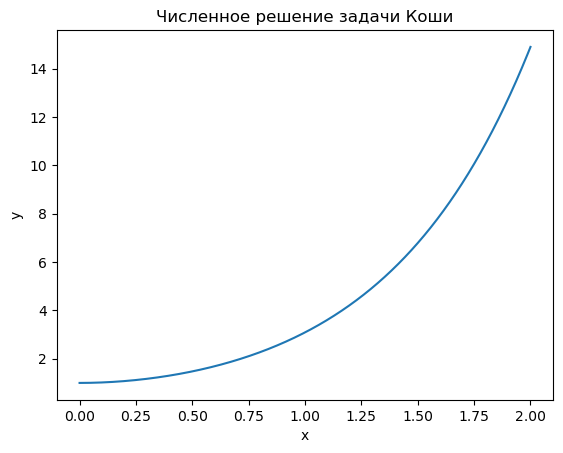

In [4]:
# График численного решения y(x)
plt.plot(x_setka, y_otvet)
plt.xlabel('x'); plt.ylabel('y')
plt.title('Численное решение задачи Коши')

Text(0.5, 1.0, 'Фазовая траектория')

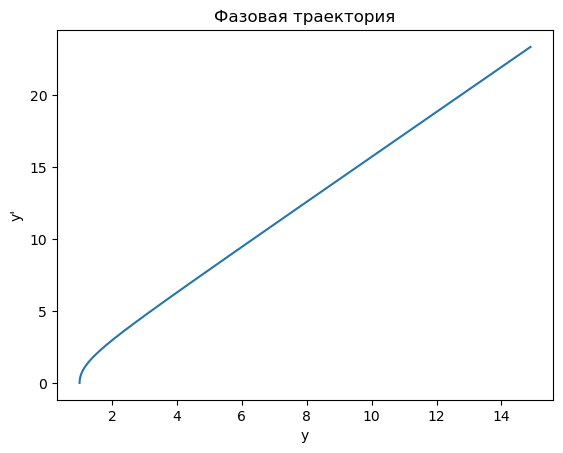

In [5]:
# График фазовой траектории y'(y)
plt.plot(y_otvet, z_otvet)
plt.xlabel('y'); plt.ylabel("y'")
plt.title('Фазовая траектория')

Text(0.5, 1.0, 'Невязка решения')

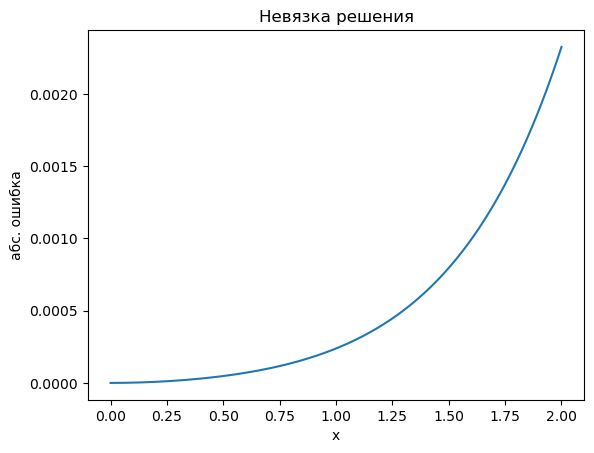

In [6]:
# График невязки численного решения с аналитическим
plt.plot(x_setka, abs(y_analitic-y_otvet))
plt.xlabel('x'); plt.ylabel("абс. ошибка")
plt.title('Невязка решения')